#### Import Libraries

In [1]:
import model_build_chlorophyll as chl_mod

##### Defining common Variables

In [ ]:
n_features=2
n_out = 7 
epochs = 30
batch_size = 32

### Bay of Bengal

##### Model Training

X_train shape: (6828, 105, 2)
Epoch 1/30
214/214 [==============================] - 6s 20ms/step - loss: 0.0848 - val_loss: 0.0592
Epoch 2/30
214/214 [==============================] - 4s 21ms/step - loss: 0.0648 - val_loss: 0.0459
Epoch 3/30
214/214 [==============================] - 5s 25ms/step - loss: 0.0577 - val_loss: 0.0377
Epoch 4/30
214/214 [==============================] - 6s 26ms/step - loss: 0.0547 - val_loss: 0.0367
Epoch 5/30
214/214 [==============================] - 5s 24ms/step - loss: 0.0540 - val_loss: 0.0370
Epoch 6/30
214/214 [==============================] - 5s 24ms/step - loss: 0.0541 - val_loss: 0.0365
Epoch 7/30
214/214 [==============================] - 5s 24ms/step - loss: 0.0533 - val_loss: 0.0375
Epoch 8/30
214/214 [==============================] - 5s 23ms/step - loss: 0.0538 - val_loss: 0.0373
Epoch 9/30
214/214 [==============================] - 5s 22ms/step - loss: 0.0533 - val_loss: 0.0355
Epoch 10/30
214/214 [==============================] - 5s 23m

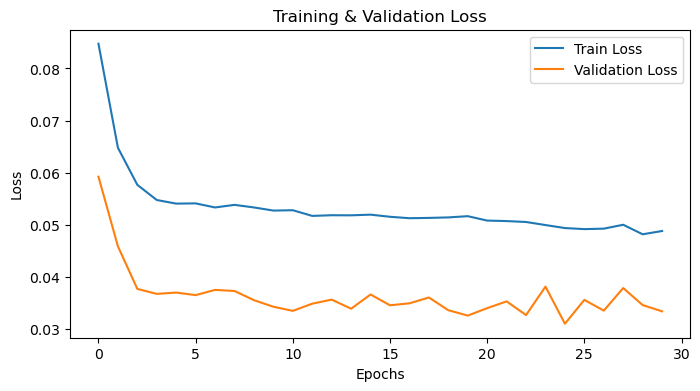

In [3]:
chl_mod.set_seeds(42)
n_lag = 105   
chl_file = "Data_chl_2020/bay_of_bengal.nc"
sst_file = "Data_sst_2020/bay_of_bengal.nc"
merged_ds = chl_mod.load_and_merge_data(chl_file, sst_file)

# Data splitting 
(train_sst, train_chl, train_month, train_time), (valid_sst, valid_chl, valid_month, valid_time), (test_sst, test_chl, test_month, test_time) = chl_mod.prepare_data_for_modeling(merged_ds)

# Scale and convert to supervised format
X_train, y_train, X_valid, y_valid, X_test, y_test, scaler, chl_min, chl_max = chl_mod.scale_and_create_sequences(train_sst, train_chl, train_month, valid_sst, valid_chl, valid_month, test_sst, test_chl, test_month, n_lag, n_out)
print("X_train shape:", X_train.shape)

model = chl_mod.build_lstm_model(n_lag, n_features, n_out=n_out)

# Fit Model
history = chl_mod.train_lstm_model(model, X_train, y_train, X_valid, y_valid, epochs=epochs, batch_size=batch_size)
chl_mod.plot_training_history(history)


#### Model Testing

43/43 [==============================] - 1s 11ms/step
t+1 RMSE: 0.0191 | MAE: 0.0130 | R²: 0.5209
t+2 RMSE: 0.0190 | MAE: 0.0128 | R²: 0.5270
t+3 RMSE: 0.0190 | MAE: 0.0129 | R²: 0.5286
t+4 RMSE: 0.0191 | MAE: 0.0131 | R²: 0.5190
t+5 RMSE: 0.0195 | MAE: 0.0133 | R²: 0.4993
t+6 RMSE: 0.0194 | MAE: 0.0133 | R²: 0.5045
t+7 RMSE: 0.0198 | MAE: 0.0137 | R²: 0.4870


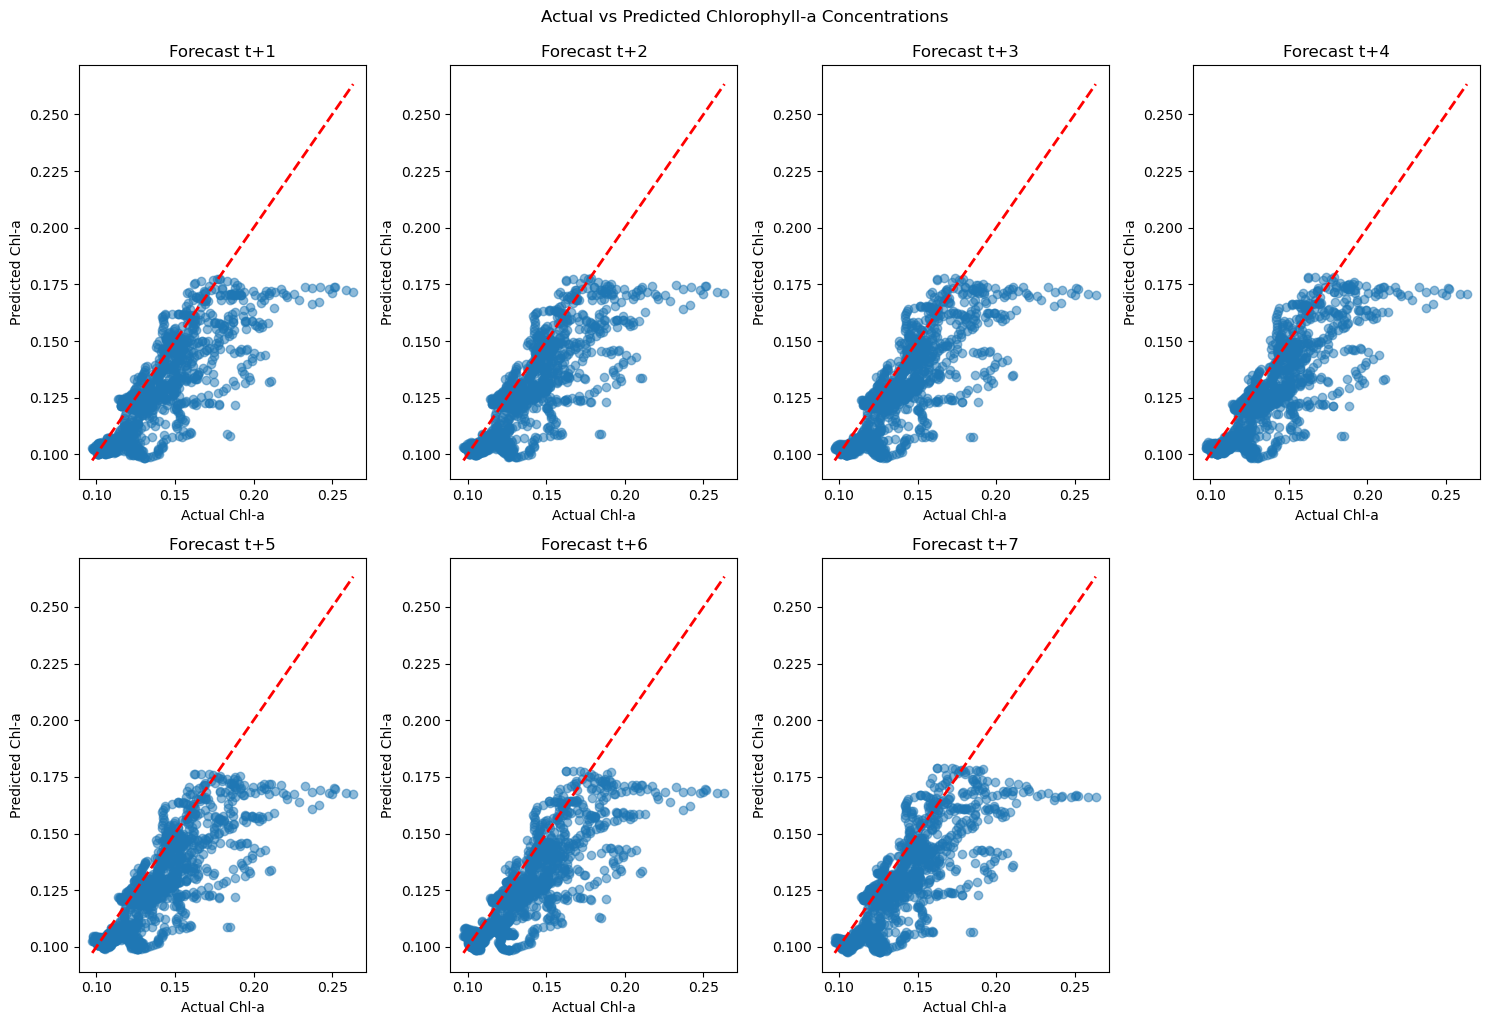

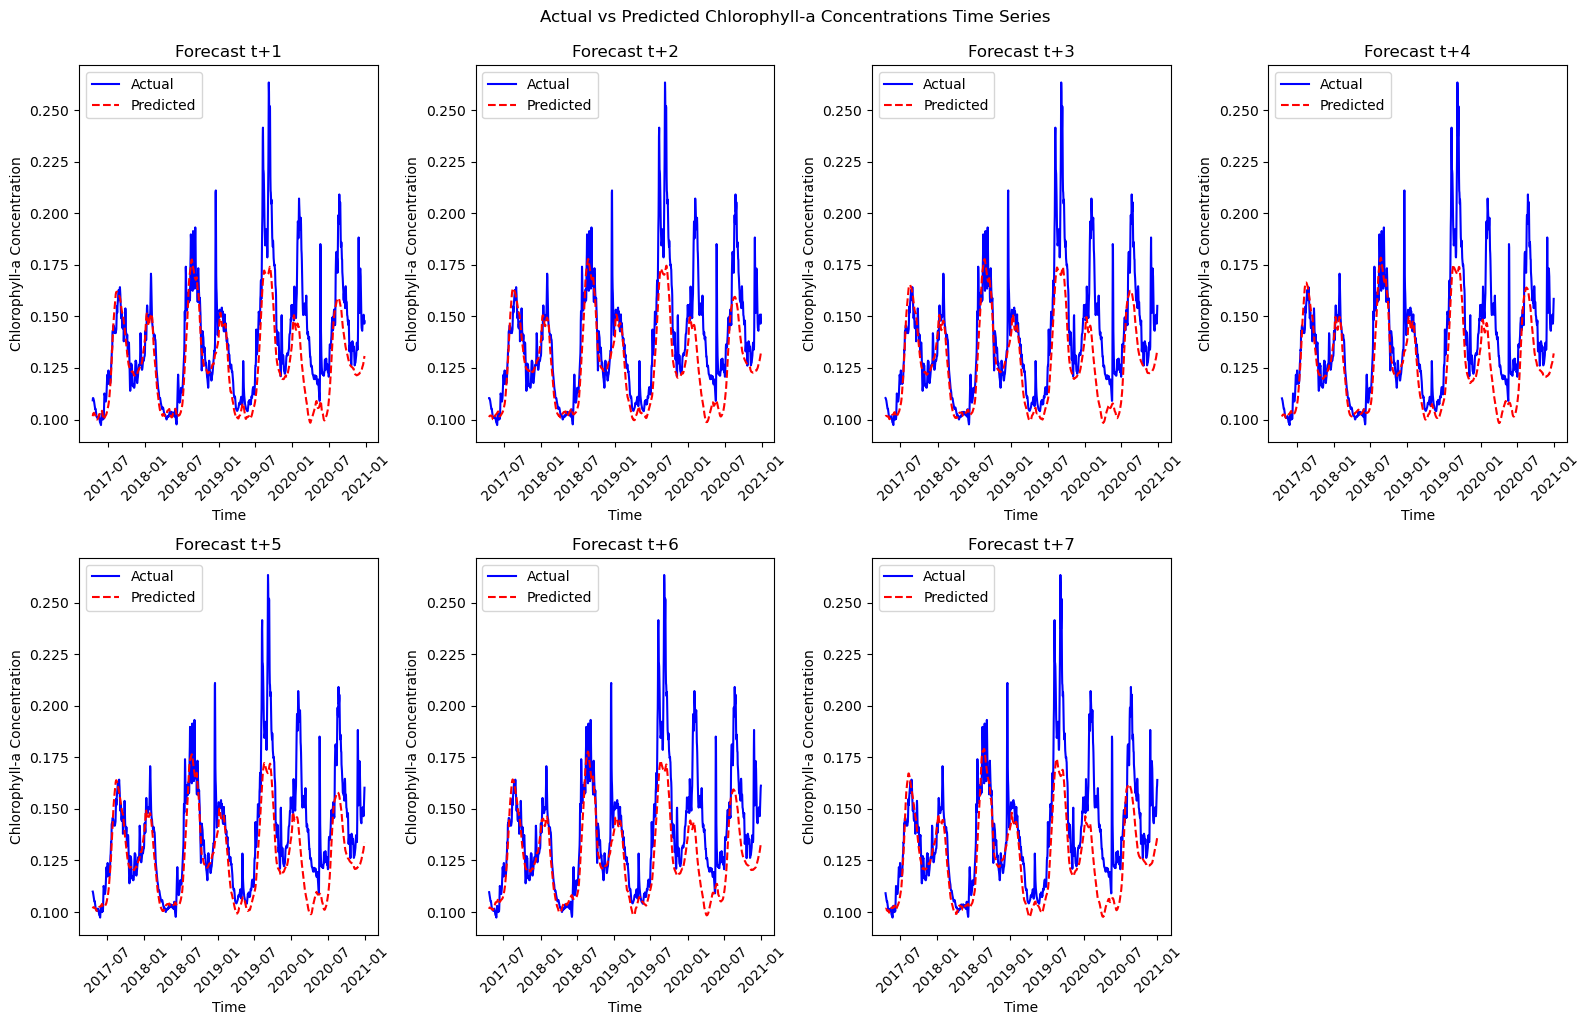

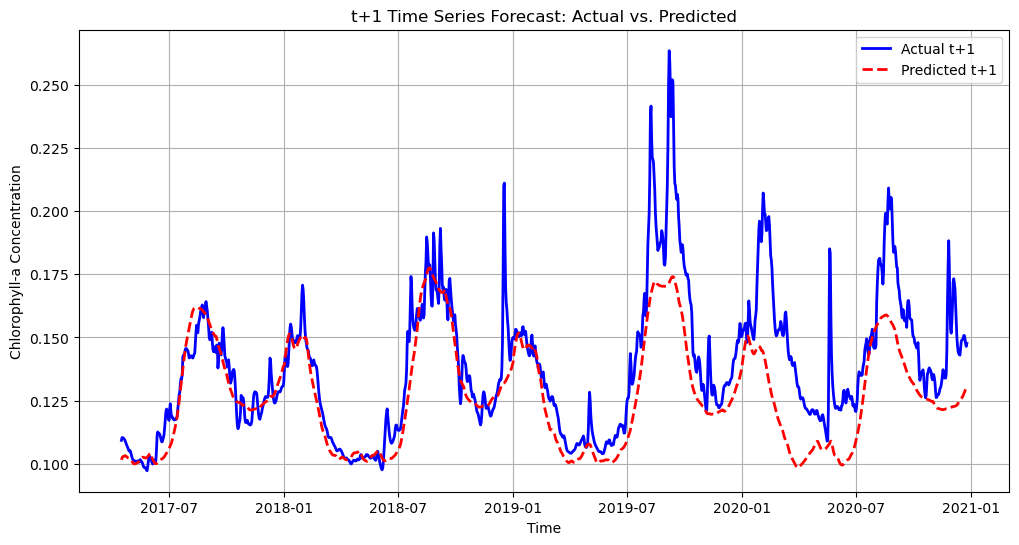

In [4]:
# Forecast and invert scaling
y_pred = model.predict(X_test)

# Invert the scaling of predictions and true target values.
y_pred_inv = chl_mod.invert_chl_scaling(y_pred, chl_min, chl_max)
y_test_inv = chl_mod.invert_chl_scaling(y_test, chl_min, chl_max)

# Evaluate forecasts and plot results.
chl_mod.evaluate_forecasts(y_test_inv, y_pred_inv, n_out)
chl_mod.plot_actual_vs_predicted(y_test_inv, y_pred_inv)
chl_mod.plot_chl_timeseries(test_time, y_test_inv, y_pred_inv, n_lag, n_out)
chl_mod.plot_t1_timeseries(test_time, y_test_inv, y_pred_inv, n_lag, n_out)

### Gulf of Mannar

#### Model Training

X_train shape: (6833, 100, 2)
Epoch 1/30
214/214 [==============================] - 8s 30ms/step - loss: 0.0648 - val_loss: 0.0427
Epoch 2/30
214/214 [==============================] - 6s 30ms/step - loss: 0.0492 - val_loss: 0.0364
Epoch 3/30
214/214 [==============================] - 7s 32ms/step - loss: 0.0456 - val_loss: 0.0362
Epoch 4/30
214/214 [==============================] - 7s 32ms/step - loss: 0.0427 - val_loss: 0.0328
Epoch 5/30
214/214 [==============================] - 7s 32ms/step - loss: 0.0416 - val_loss: 0.0334
Epoch 6/30
214/214 [==============================] - 7s 33ms/step - loss: 0.0406 - val_loss: 0.0320
Epoch 7/30
214/214 [==============================] - 7s 35ms/step - loss: 0.0408 - val_loss: 0.0314
Epoch 8/30
214/214 [==============================] - 5s 25ms/step - loss: 0.0397 - val_loss: 0.0324
Epoch 9/30
214/214 [==============================] - 6s 27ms/step - loss: 0.0393 - val_loss: 0.0316
Epoch 10/30
214/214 [==============================] - 6s 28m

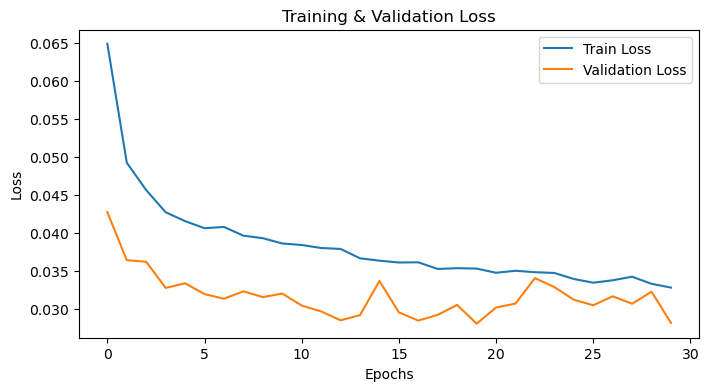

In [6]:
chl_mod.set_seeds(42)
n_lag = 100   
chl_file = "Data_chl_2020/gulf_of_mannar.nc"
sst_file = "Data_sst_2020/gulf_of_mannar.nc"
merged_ds = chl_mod.load_and_merge_data(chl_file, sst_file)

# Data splitting 
(train_sst, train_chl, train_month, train_time), (valid_sst, valid_chl, valid_month, valid_time), (test_sst, test_chl, test_month, test_time) = chl_mod.prepare_data_for_modeling(merged_ds)

# Scale and convert to supervised format
X_train, y_train, X_valid, y_valid, X_test, y_test, scaler, chl_min, chl_max = chl_mod.scale_and_create_sequences(train_sst, train_chl, train_month, valid_sst, valid_chl, valid_month, test_sst, test_chl, test_month, n_lag, n_out)
print("X_train shape:", X_train.shape)


model = chl_mod.build_lstm_model(n_lag, n_features, n_out=n_out)

# Fit Model
history = chl_mod.train_lstm_model(model, X_train, y_train, X_valid, y_valid, epochs=epochs, batch_size=batch_size)
chl_mod.plot_training_history(history)


##### Model Testing

43/43 [==============================] - 1s 13ms/step
t+1 RMSE: 0.1116 | MAE: 0.0557 | R²: 0.6701
t+2 RMSE: 0.1100 | MAE: 0.0541 | R²: 0.6796
t+3 RMSE: 0.1103 | MAE: 0.0541 | R²: 0.6776
t+4 RMSE: 0.1081 | MAE: 0.0541 | R²: 0.6900
t+5 RMSE: 0.1049 | MAE: 0.0522 | R²: 0.7077
t+6 RMSE: 0.1052 | MAE: 0.0524 | R²: 0.7062
t+7 RMSE: 0.1049 | MAE: 0.0529 | R²: 0.7077


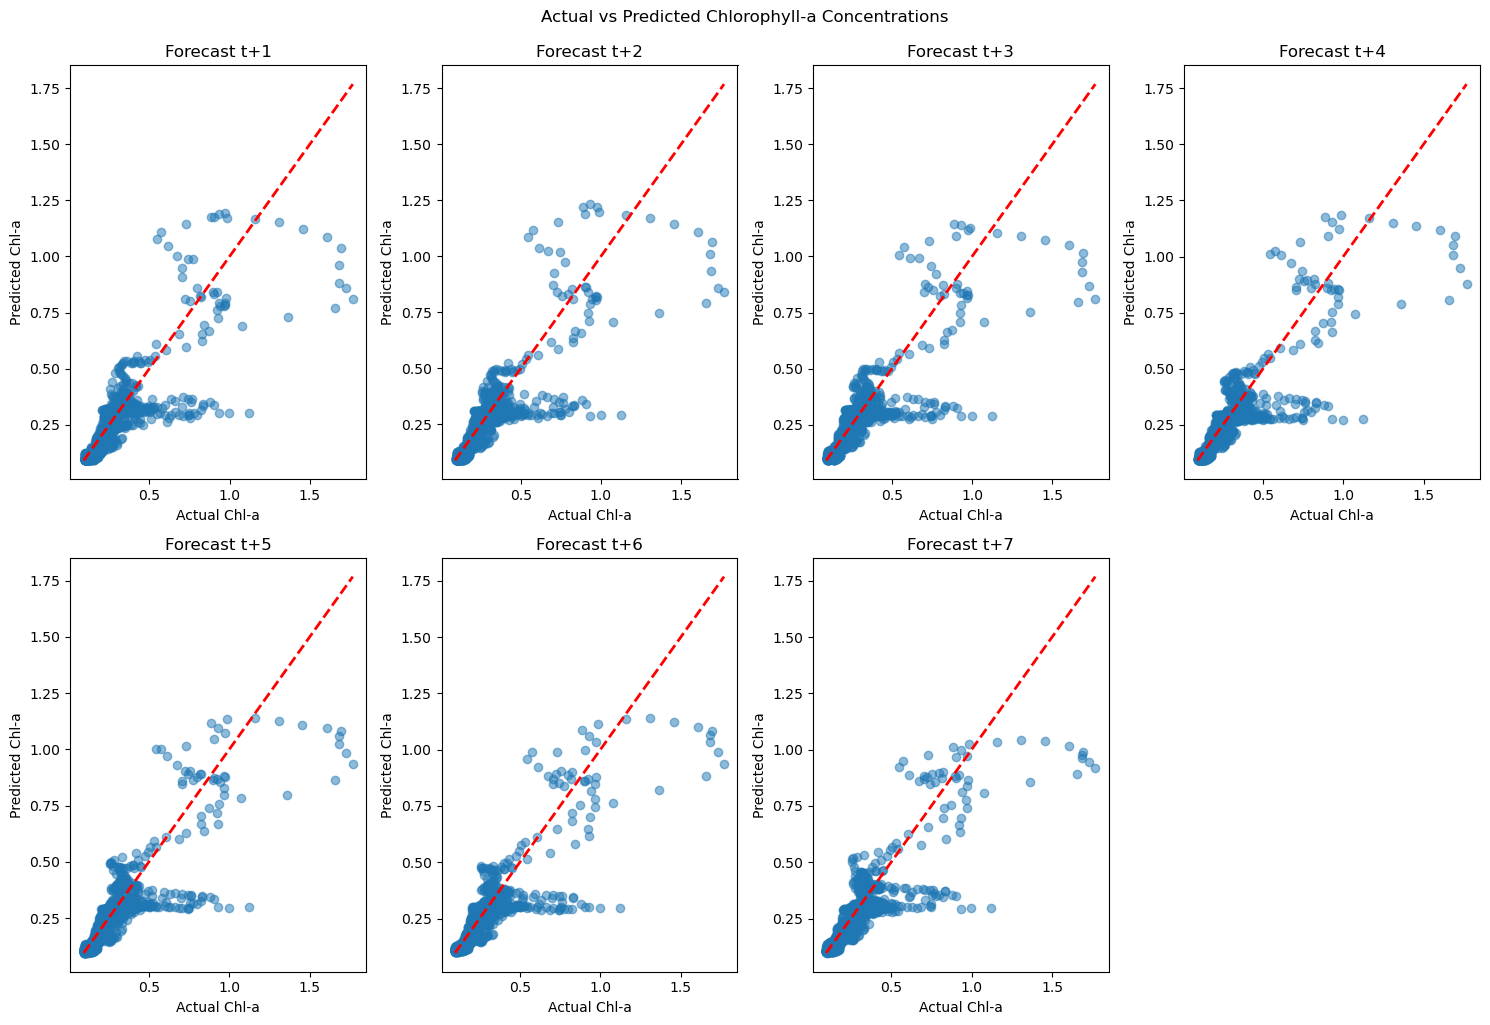

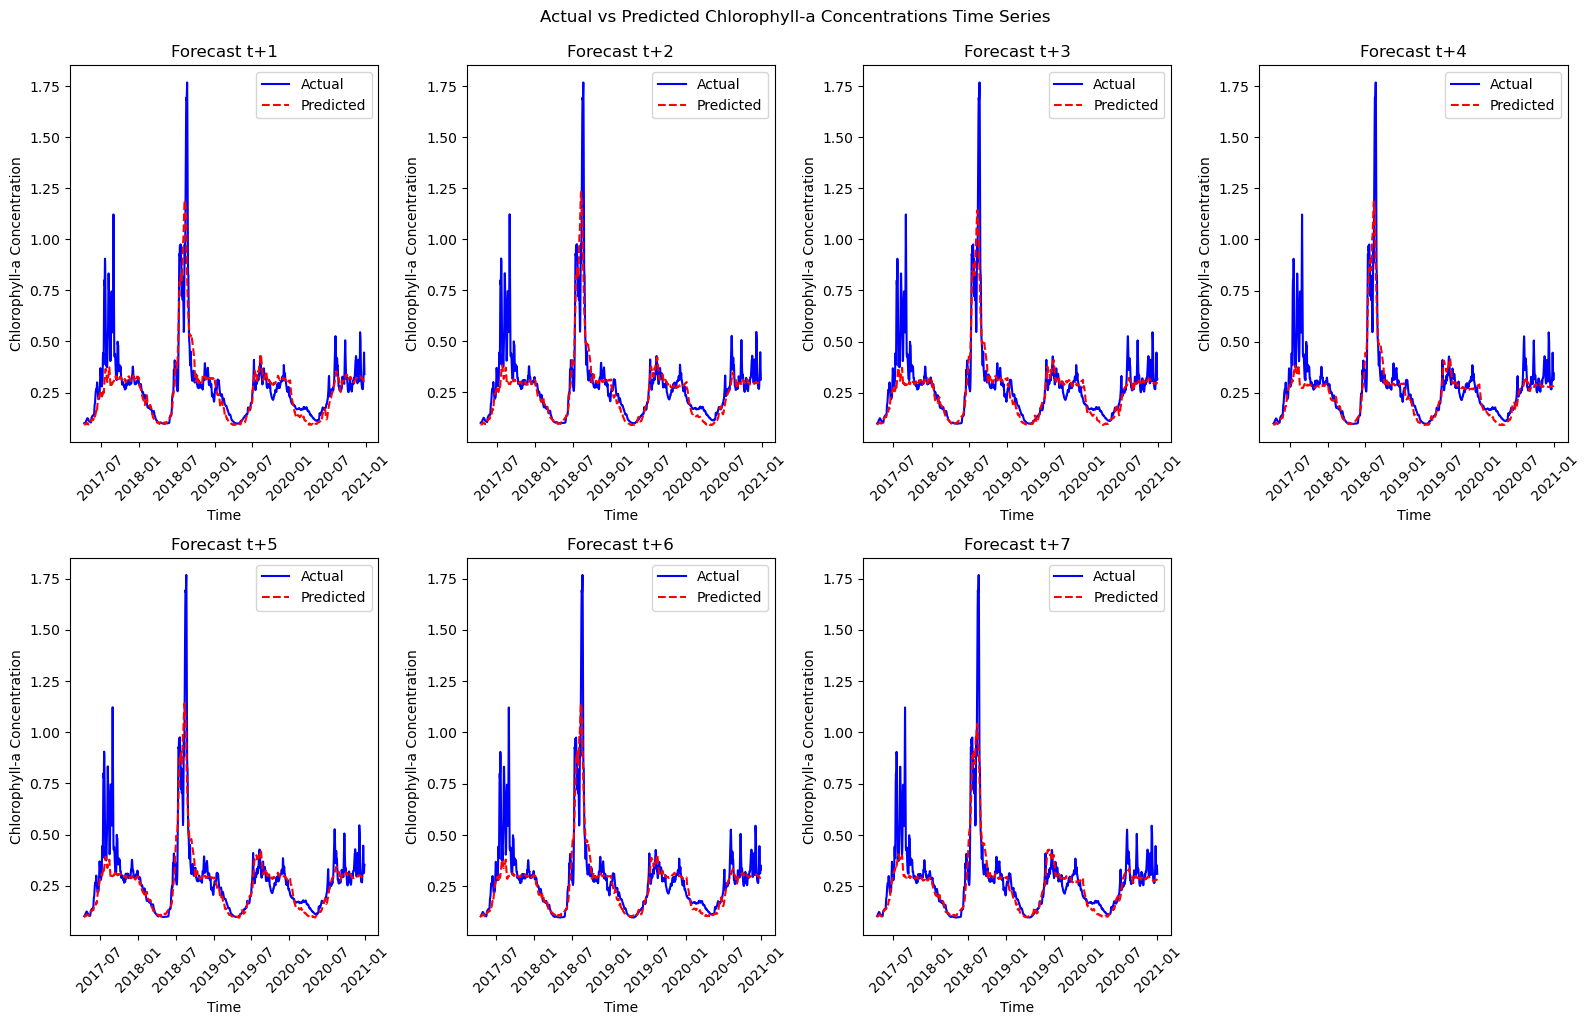

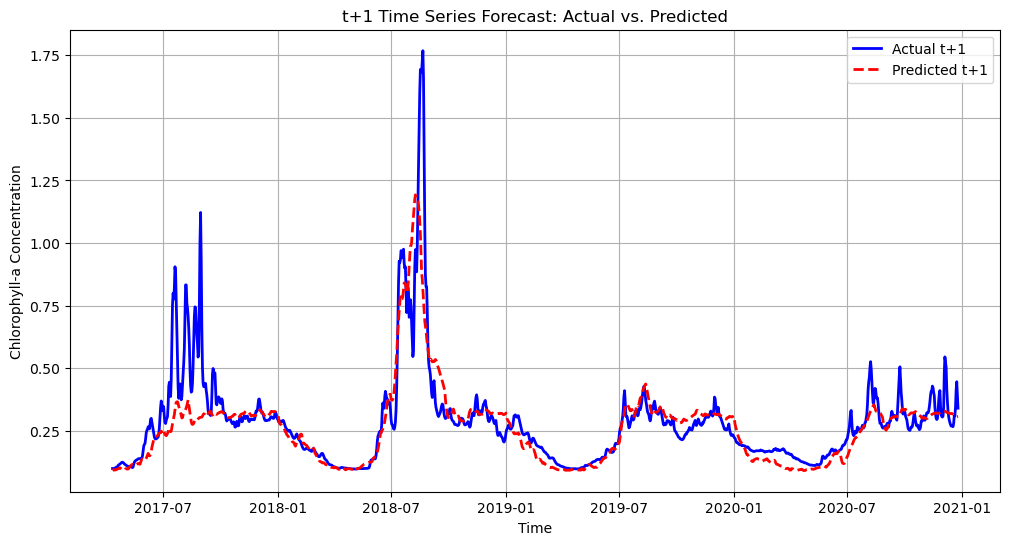

In [7]:
# Forecast and invert scaling
y_pred = model.predict(X_test)

# Invert the scaling of predictions and true target values.
y_pred_inv = chl_mod.invert_chl_scaling(y_pred, chl_min, chl_max)
y_test_inv = chl_mod.invert_chl_scaling(y_test, chl_min, chl_max)

# Evaluate forecasts and plot results.
chl_mod.evaluate_forecasts(y_test_inv, y_pred_inv, n_out)
chl_mod.plot_actual_vs_predicted(y_test_inv, y_pred_inv)
chl_mod.plot_chl_timeseries(test_time, y_test_inv, y_pred_inv, n_lag, n_out)
chl_mod.plot_t1_timeseries(test_time, y_test_inv, y_pred_inv, n_lag, n_out)

### Laccadive Sea

#### Model Training

X_train shape: (6808, 125, 2)
Epoch 1/30
213/213 [==============================] - 12s 47ms/step - loss: 0.0929 - val_loss: 0.0643
Epoch 2/30
213/213 [==============================] - 9s 42ms/step - loss: 0.0786 - val_loss: 0.0632
Epoch 3/30
213/213 [==============================] - 10s 46ms/step - loss: 0.0738 - val_loss: 0.0563
Epoch 4/30
213/213 [==============================] - 10s 47ms/step - loss: 0.0719 - val_loss: 0.0486
Epoch 5/30
213/213 [==============================] - 12s 58ms/step - loss: 0.0699 - val_loss: 0.0470
Epoch 6/30
213/213 [==============================] - 13s 62ms/step - loss: 0.0686 - val_loss: 0.0462
Epoch 7/30
213/213 [==============================] - 11s 52ms/step - loss: 0.0687 - val_loss: 0.0443
Epoch 8/30
213/213 [==============================] - 10s 46ms/step - loss: 0.0677 - val_loss: 0.0469
Epoch 9/30
213/213 [==============================] - 12s 58ms/step - loss: 0.0673 - val_loss: 0.0475
Epoch 10/30
213/213 [==============================] 

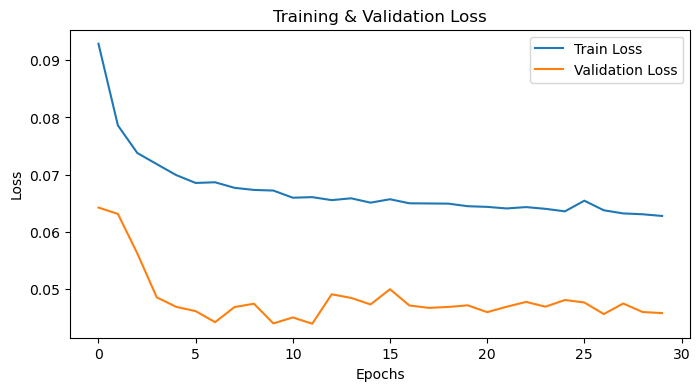

In [9]:
chl_mod.set_seeds(42)
n_lag = 125   
chl_file = "Data_chl_2020/laccadive_sea.nc"
sst_file = "Data_sst_2020/laccadive_sea.nc"
merged_ds = chl_mod.load_and_merge_data(chl_file, sst_file)

# Data splitting 
(train_sst, train_chl, train_month, train_time), (valid_sst, valid_chl, valid_month, valid_time), (test_sst, test_chl, test_month, test_time) = chl_mod.prepare_data_for_modeling(merged_ds)

# Scale and convert to supervised format
X_train, y_train, X_valid, y_valid, X_test, y_test, scaler, chl_min, chl_max = chl_mod.scale_and_create_sequences(train_sst, train_chl, train_month, valid_sst, valid_chl, valid_month, test_sst, test_chl, test_month, n_lag, n_out)
print("X_train shape:", X_train.shape)


model = chl_mod.build_lstm_model(n_lag, n_features, n_out=n_out)

# Fit Model
history = chl_mod.train_lstm_model(model, X_train, y_train, X_valid, y_valid, epochs=epochs, batch_size=batch_size)
chl_mod.plot_training_history(history)


#### Model Testing

42/42 [==============================] - 1s 11ms/step
t+1 RMSE: 0.0223 | MAE: 0.0161 | R²: 0.5005
t+2 RMSE: 0.0228 | MAE: 0.0164 | R²: 0.4764
t+3 RMSE: 0.0230 | MAE: 0.0166 | R²: 0.4707
t+4 RMSE: 0.0236 | MAE: 0.0169 | R²: 0.4418
t+5 RMSE: 0.0240 | MAE: 0.0172 | R²: 0.4222
t+6 RMSE: 0.0252 | MAE: 0.0181 | R²: 0.3633
t+7 RMSE: 0.0249 | MAE: 0.0178 | R²: 0.3774


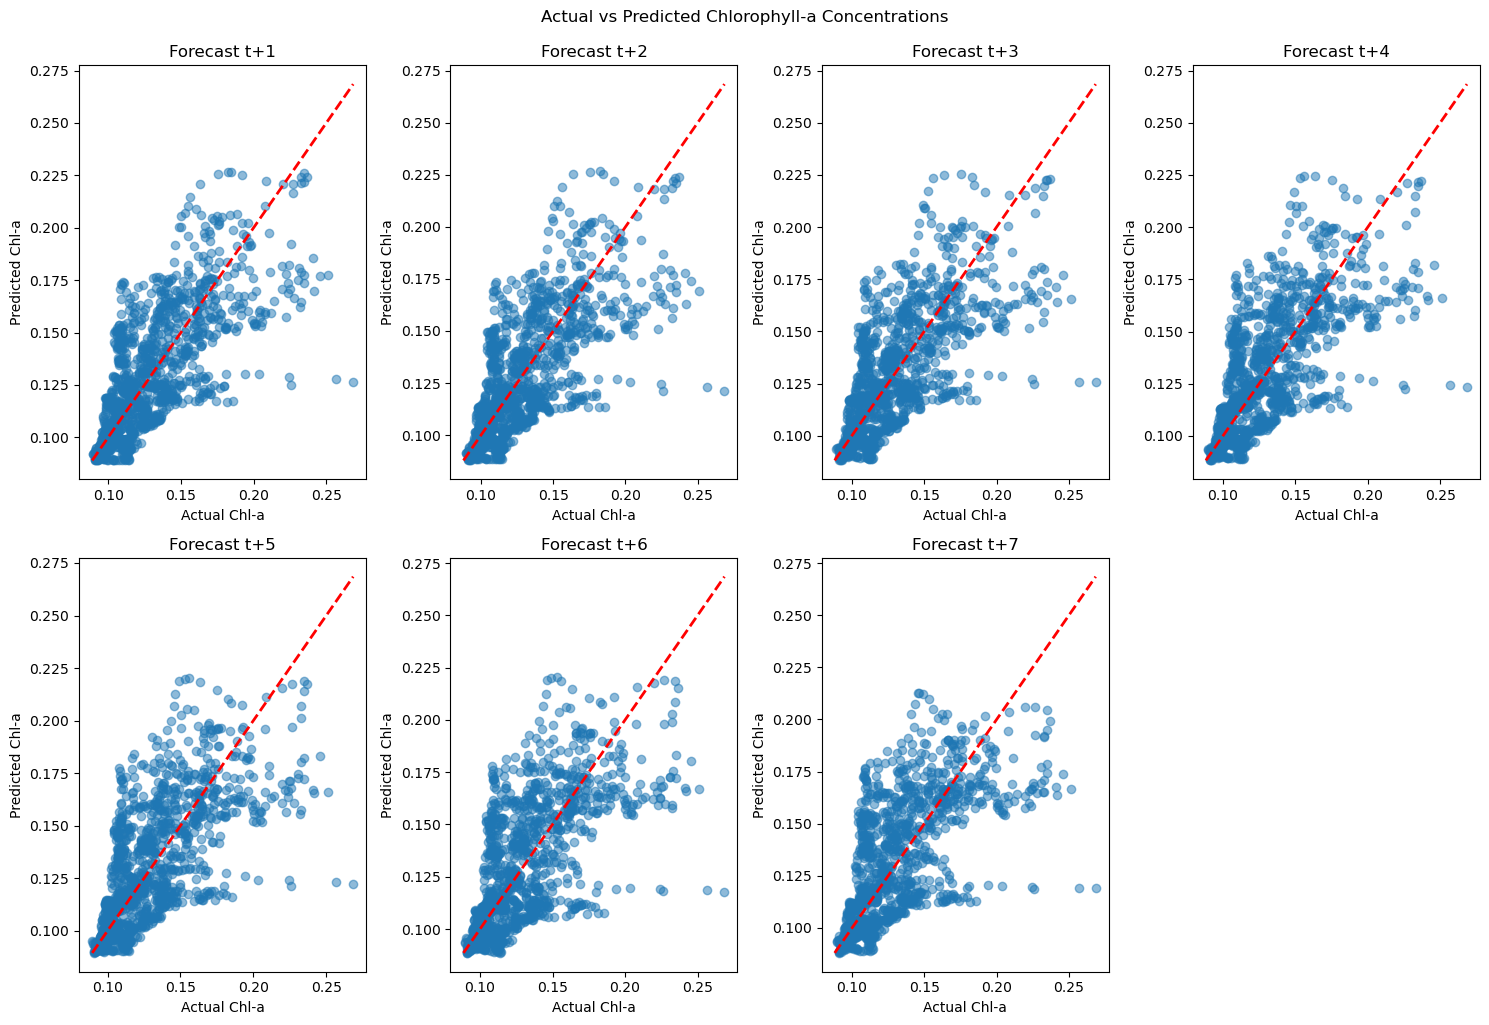

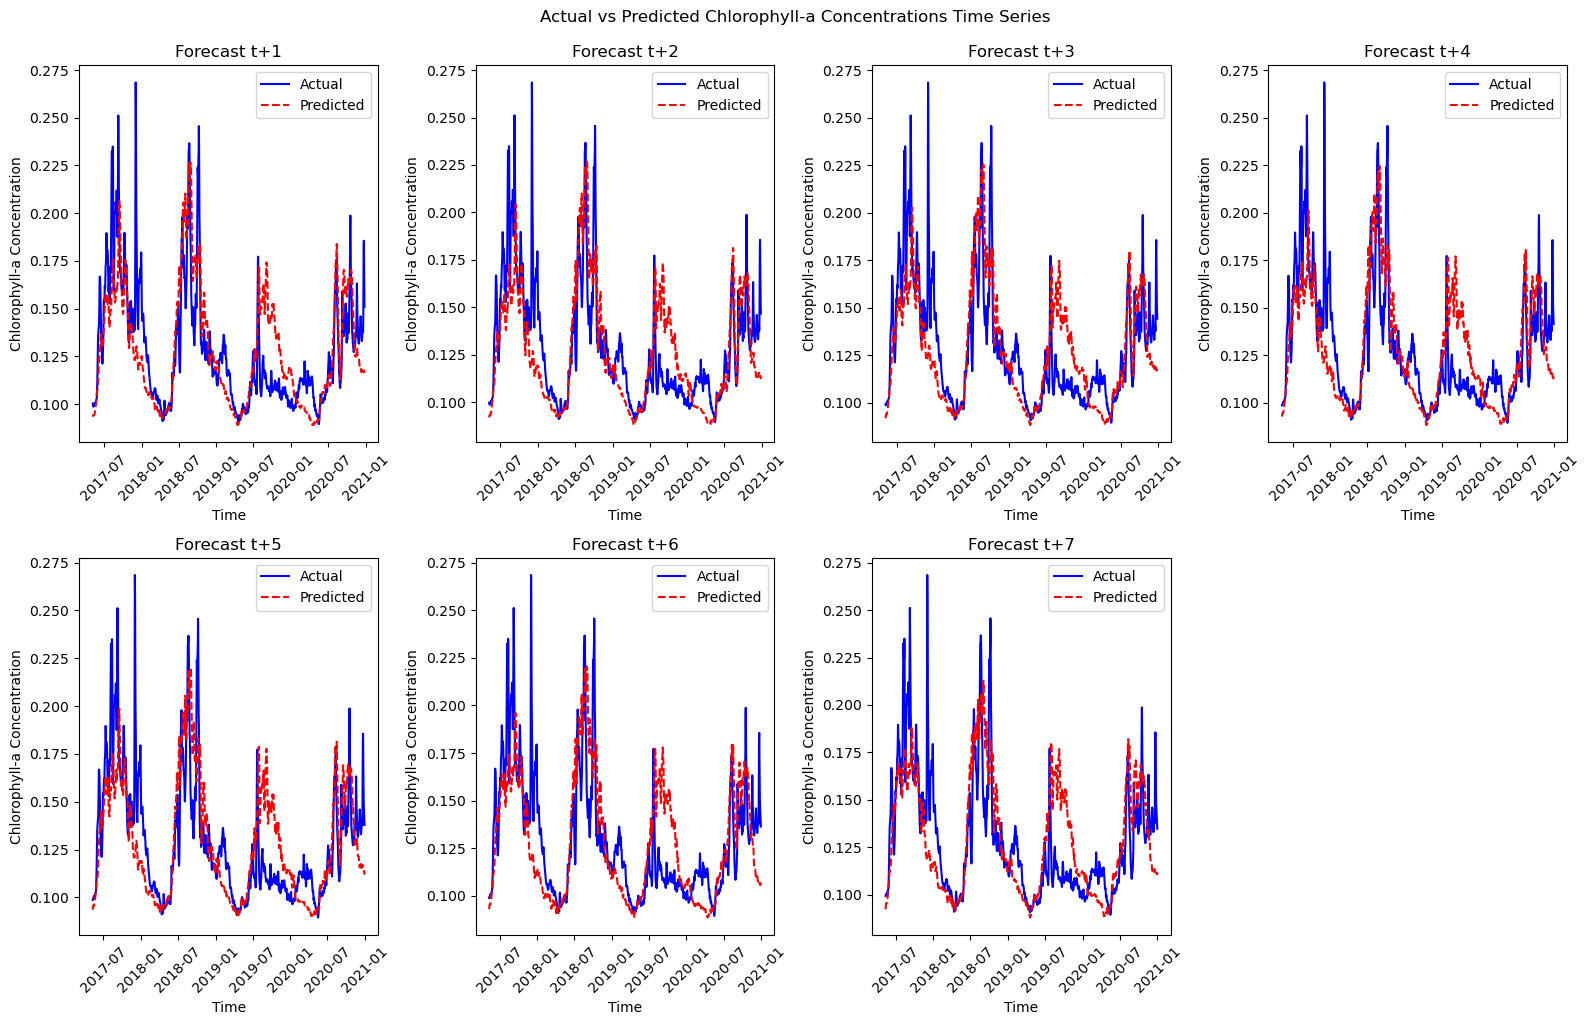

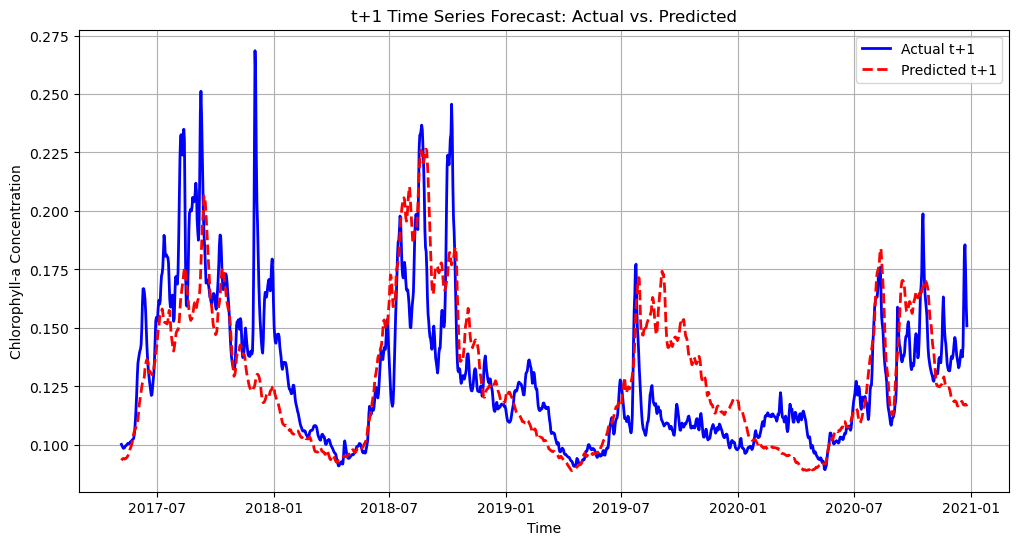

In [10]:
# Forecast and invert scaling
y_pred = model.predict(X_test)

# Invert the scaling of predictions and true target values.
y_pred_inv = chl_mod.invert_chl_scaling(y_pred, chl_min, chl_max)
y_test_inv = chl_mod.invert_chl_scaling(y_test, chl_min, chl_max)

# Evaluate forecasts and plot results.
chl_mod.evaluate_forecasts(y_test_inv, y_pred_inv, n_out)
chl_mod.plot_actual_vs_predicted(y_test_inv, y_pred_inv)
chl_mod.plot_chl_timeseries(test_time, y_test_inv, y_pred_inv, n_lag, n_out)
chl_mod.plot_t1_timeseries(test_time, y_test_inv, y_pred_inv, n_lag, n_out)

### Sri Lankan Coast 

#### Model Training

X_train shape: (6808, 125, 2)
Epoch 1/30
213/213 [==============================] - 9s 37ms/step - loss: 0.0792 - val_loss: 0.0439
Epoch 2/30
213/213 [==============================] - 8s 37ms/step - loss: 0.0666 - val_loss: 0.0451
Epoch 3/30
213/213 [==============================] - 9s 42ms/step - loss: 0.0593 - val_loss: 0.0402
Epoch 4/30
213/213 [==============================] - 9s 42ms/step - loss: 0.0558 - val_loss: 0.0396
Epoch 5/30
213/213 [==============================] - 10s 45ms/step - loss: 0.0562 - val_loss: 0.0457
Epoch 6/30
213/213 [==============================] - 11s 49ms/step - loss: 0.0547 - val_loss: 0.0449
Epoch 7/30
213/213 [==============================] - 12s 58ms/step - loss: 0.0541 - val_loss: 0.0405
Epoch 8/30
213/213 [==============================] - 11s 52ms/step - loss: 0.0541 - val_loss: 0.0431
Epoch 9/30
213/213 [==============================] - 11s 51ms/step - loss: 0.0537 - val_loss: 0.0384
Epoch 10/30
213/213 [==============================] - 1

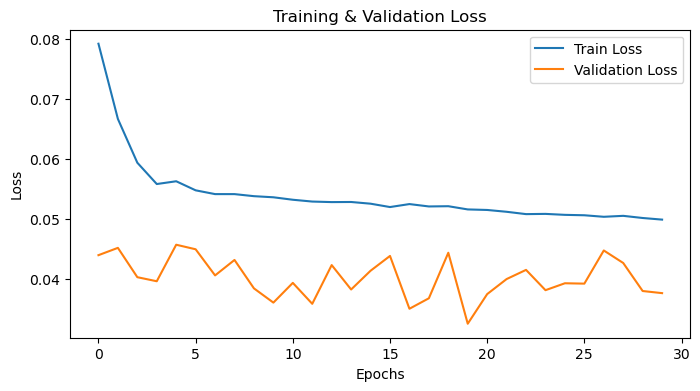

In [12]:
chl_mod.set_seeds(42)
n_lag = 126
chl_file = "Data_chl_2020/sri_lankan_coast.nc"
sst_file = "Data_sst_2020/sri_lankan_coast.nc"
merged_ds = chl_mod.load_and_merge_data(chl_file, sst_file)

# Data splitting 
(train_sst, train_chl, train_month, train_time), (valid_sst, valid_chl, valid_month, valid_time), (test_sst, test_chl, test_month, test_time) = chl_mod.prepare_data_for_modeling(merged_ds)

# Scale and convert to supervised format
X_train, y_train, X_valid, y_valid, X_test, y_test, scaler, chl_min, chl_max = chl_mod.scale_and_create_sequences(train_sst, train_chl, train_month, valid_sst, valid_chl, valid_month, test_sst, test_chl, test_month, n_lag, n_out)
print("X_train shape:", X_train.shape)


model = chl_mod.build_lstm_model(n_lag, n_features, n_out=n_out)

# Fit Model
history = chl_mod.train_lstm_model(model, X_train, y_train, X_valid, y_valid, epochs=epochs, batch_size=batch_size)
chl_mod.plot_training_history(history)


#### Model Testing

42/42 [==============================] - 1s 15ms/step
t+1 RMSE: 0.0236 | MAE: 0.0162 | R²: 0.4899
t+2 RMSE: 0.0230 | MAE: 0.0156 | R²: 0.5139
t+3 RMSE: 0.0238 | MAE: 0.0162 | R²: 0.4798
t+4 RMSE: 0.0241 | MAE: 0.0164 | R²: 0.4671
t+5 RMSE: 0.0247 | MAE: 0.0169 | R²: 0.4393
t+6 RMSE: 0.0238 | MAE: 0.0160 | R²: 0.4781
t+7 RMSE: 0.0234 | MAE: 0.0157 | R²: 0.4976


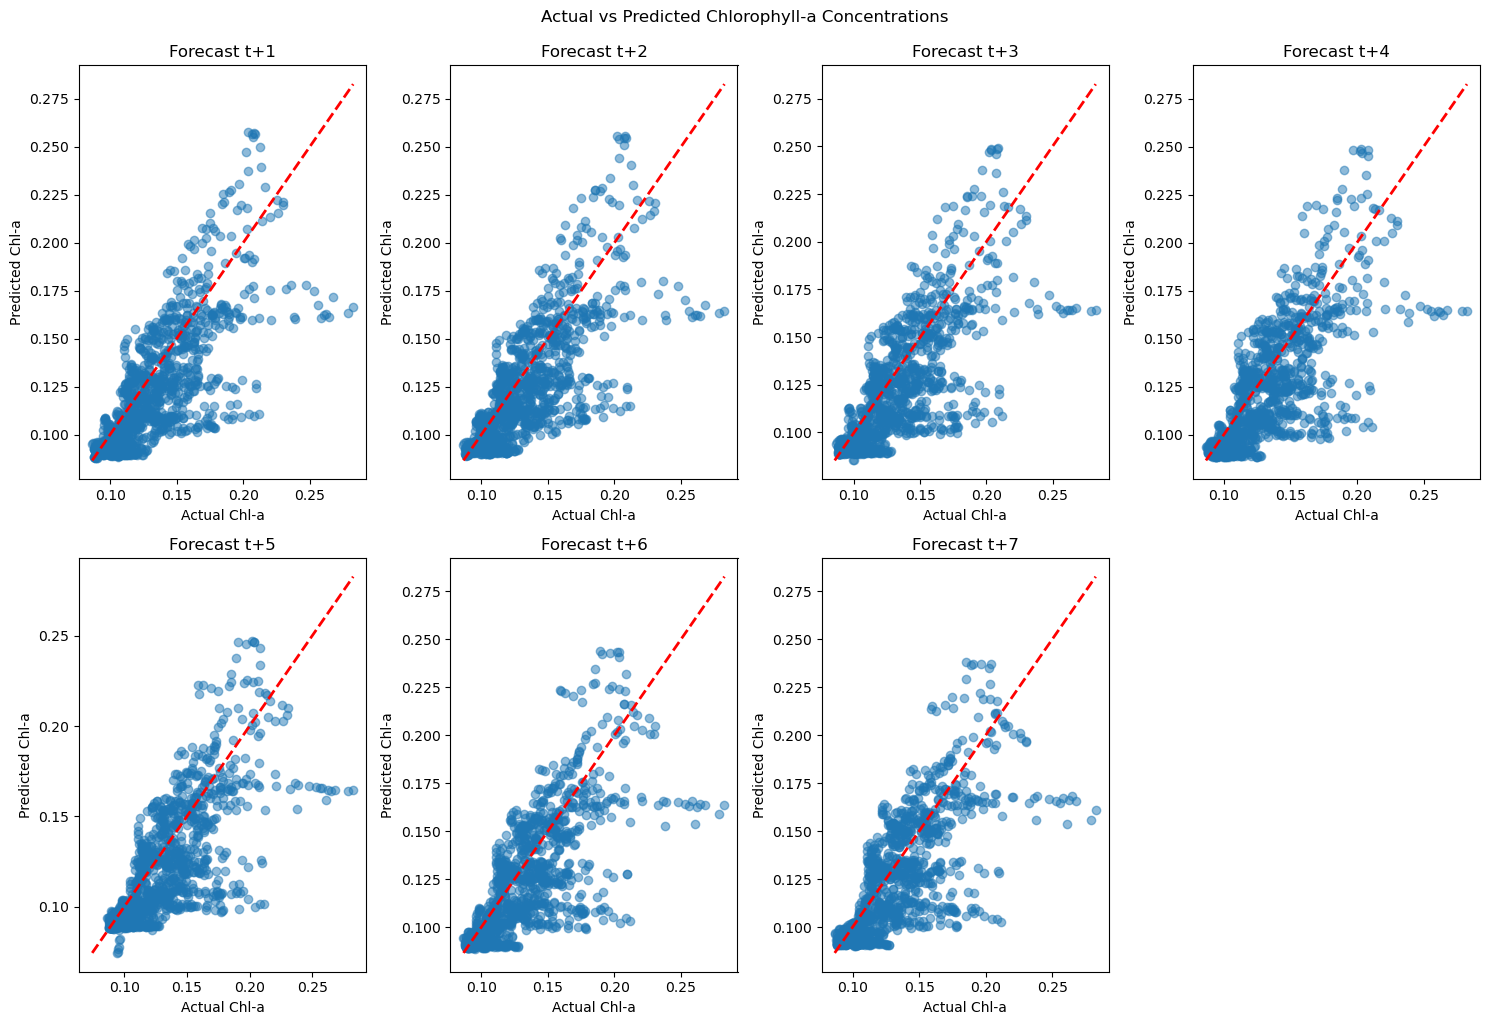

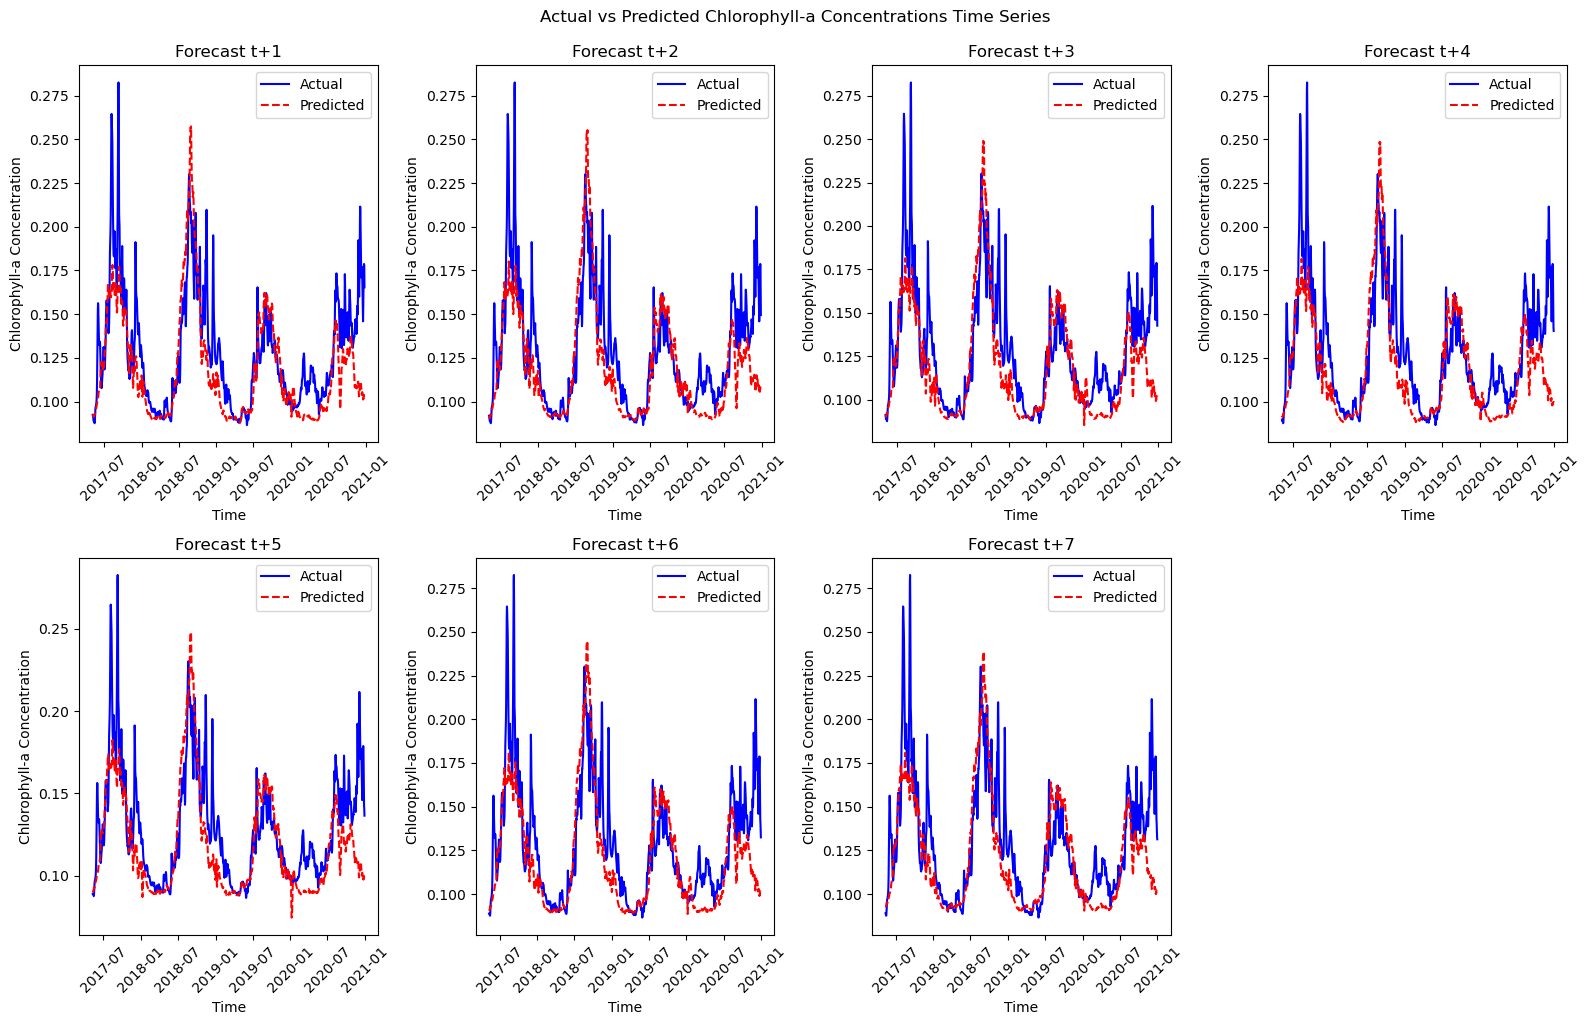

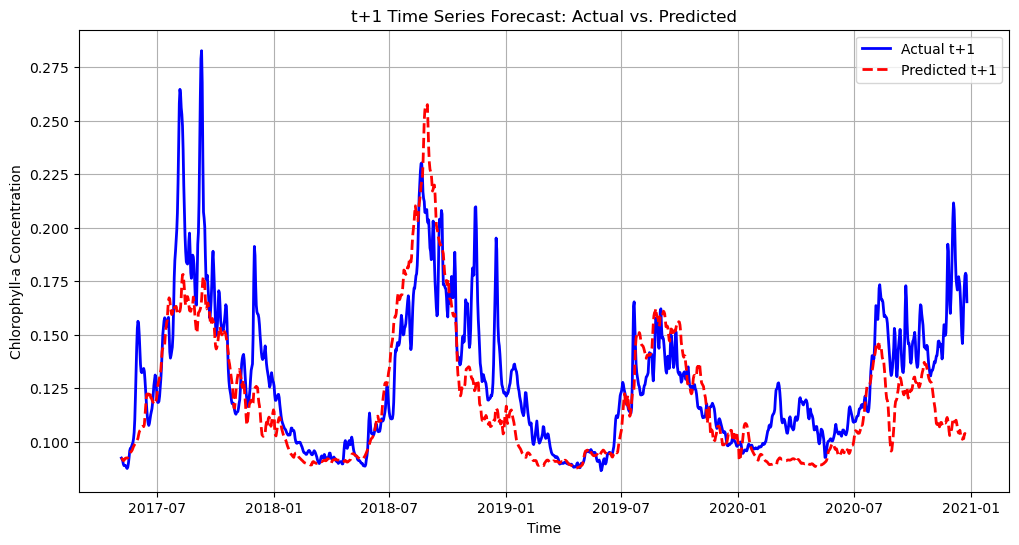

In [13]:
# Forecast and invert scaling
y_pred = model.predict(X_test)

# Invert the scaling of predictions and true target values.
y_pred_inv = chl_mod.invert_chl_scaling(y_pred, chl_min, chl_max)
y_test_inv = chl_mod.invert_chl_scaling(y_test, chl_min, chl_max)

# Evaluate forecasts and plot results.
chl_mod.evaluate_forecasts(y_test_inv, y_pred_inv, n_out)
chl_mod.plot_actual_vs_predicted(y_test_inv, y_pred_inv)
chl_mod.plot_chl_timeseries(test_time, y_test_inv, y_pred_inv, n_lag, n_out)
chl_mod.plot_t1_timeseries(test_time, y_test_inv, y_pred_inv, n_lag, n_out)